# Bahasan: Searching

## Langkah kerja: Tugas 1
Modifikasilah pencarian biner sehingga mempertimbangkan faktor kedekatan nilai yang dicari dengan batas kiri dan kanan pencarian. Misalnya pada array terurut yang berukuran 1000 dengan nilai terkecil 100 nilai terbesar 10.000. Kita mencari nilai 9000. Pada pencarian biner standar pencarian dimulai dari pertengahan array yaitu dari indeks ke 500. Namun pertimbangkan bahwa nilai yang dicari yaitu 9 000 tidak berada di tengah 100 dan 10.000. Dia jauh lebih dekat ke 10.000 ribu ketimbang ke nilai 100. Sehingga lebih masuk akal pencarian dilakukan terhadap indeks yang mendekati 1000 misalnya indeks ke 900. hint : gunakan interpolasi linier


### Membuat kode program:

In [ ]:
# Membuat Array yang berisi nilai 100 - 10.000
low = 100 # -> bisa disebut y0
high = 10000 # -> bisa disebut y1
numbers = [y for y in range(low, high + 1, 100)]

# Membuat function dengan rumus interpolasi liner
def function(x: int, numbers: list[int], low: int = None, high: int = None):
  if low is None or high is None:
    # Nah dalam hal ini saya mengibaratkan low = x0 dan high = x1 dalam koordinat kartesius
    low, high = 0, len(numbers) - 1
  # Rumus interpolasi linear -> y = (y0) + m(x - x0)
  m = ((high - low) // (numbers[high] - numbers[low]))
  y = low + ((x - numbers[low]) * m)
  # Membuat base case
  if low > high or x < numbers[low] or x > numbers[high]:
    return -1
  if numbers[low] == numbers[high]:
    return -1
  # base case yang terpenuhi ketika rumus interpolasi linear tepat dengan y yang dicari
  if numbers[y] == x:
    return y
  # Recursive case untuk mengecek apakah benar x dari hasil rumus itu sudah mendekati atau sama dengan index dari y?
  elif numbers[y] < x:
    return function(x, numbers, y + 1, high)
  else:
    return function(x, numbers, low, y - 1)
print(function(9000, numbers))


89


### Konteks dan penjelasan:
Jadi dalam kode ini saya mengaplikasikan rumus _Linear Interpolation_ dalam matematika. Tujuan dari rumus ini biasanya untuk mencari nilai y dalam suatu garis lurus (x0, y0) dan (x1, y1). Dalam kode, array numbers menginterpretasikan sebuah garis dalam bidang kartesius jika di dalam bidang matematika murni.
```
numbers = [ 100, 200, ....., 1000 ]
```
- artinya setiap index dari array bisa dianggap x -> dalam bidang kartesius <br>
- 100, 200, ..., 1000 atau biasa di sebut numbers[index] bisa dianggap y dalam bidang kartesius

Lalu karena kita diminta mencari index ke berapa (x) dari 9000 (y). Maka kita akan me-_reverse_ rumus aslinya di matematika

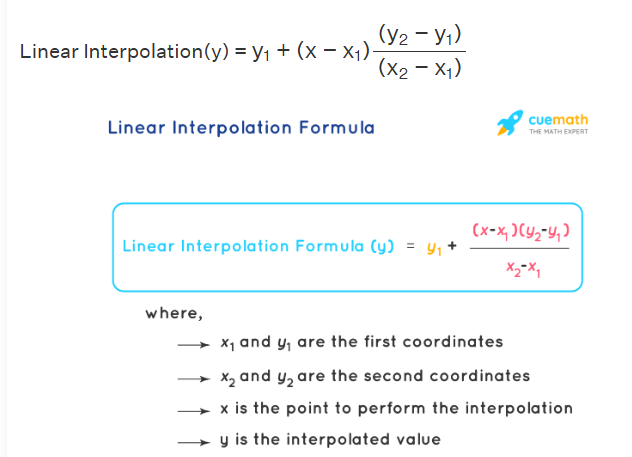

### Saya mengambil suumber dari https://www.cuemath.com/linear-interpolation-formula/
Dari gambar tersebut rumus nya mencari y ( value index array ) sedangkan kita ingin mencari index nya ( x ). karena itu rumus yang tadinya:

$$
y = y_1 + \left(\frac{y_2 - y_1}{x_2 - x_1}\right) \cdot (x - x_1)
$$

Berubah menjadi:

$$
x = x_1 + \left(\frac{y - y_1}{y_2 - y_1}\right) \cdot (x_2 - x_1)
$$

Dalam implementasi kode saya di python menjadi:
```
  m = ((high - low) // (numbers[high] - numbers[low]))
  y = low + ((x - numbers[low]) * m)
```

## Langkah Kerja: Tugas 2
Modifikasi linear search untuk mencari banyaknya pasangan bilangan yang memiliki selisih k. Jadi bukan mencari k. Misalnya dari bilangan 1, 2, 2, 5, 9, 1 3, 14 , 17. nilai k adalah 3, maka akan menghasilkan output 3 yaitu dua buah pasangan 2 dan 5; kemudian pasangan 14 dan 17. tiga pasangan bilangan tersebut adalah bilangan yang memiliki selisih 3

### Kode Program:

In [1]:
# Membuat array untuk bilangan yang ingin di cek
numbers = [1, 2, 2, 5, 9, 1, 3, 14, 17]

# Membuat function untuk algortima programnya
def function(dif: int, numbers: list[int], i: int = 0, j: int = 1):
  # Membuat base case untuk menghentikan rekursif ketika index sudah mencari hingga index terakhir list
  if i >= len(numbers) - 1:
    return 0
  # Membuat recursive case, yakni ketika index j ( index setelah i) sudah dibandingkan dengan index sebelum j itu sendiri (i)
  if j >= len(numbers):
    return function(dif, numbers, i + 1, i + 2) # Menambah index untuk mnegecek angka selanjutnya (angka setelah index-0)
  # Menghitung total count yang sesuai dengan dif
  count = 0
  if numbers[j] - numbers[i] == dif:
    count = 1

  # Mereturn hasil dari masing-masing fungsi rekursif yang dipanggil
  return count + function(dif, numbers, i, j + 1)
# Show output
print(function(3, numbers))

3


### Konteks dan penjelasan:


Jadi pada code tersebut saya berusaha menggunakan recursive sebagai algoritmanya untuk mencari total selisih bernilai tiga dengan metode linear search.
> Dalam Linear seacrh rekursif sebelumnya, biasanya hanya meminta dan mengecek satu angka yang ingin dicari di sekumpulan angka dalam list. Namun karena disini yang diminta adalah **selisih** maka saya memodifikasi sedikit menggunakan _tail recursive._

Pada bagian:
```
  if i >= len(numbers) - 1:
    return 0
```
Merupakan _base case yang nantinya akan menghentikan _recursive case._Mirip dengan Linear search dasar. Perbedaan yang terlihat ad pada bagian parameternya, yakni:
```
def function(dif: int, numbers: list[int], i: int = 0, j: int = 1):
```
Karena diminta untuk mencari selisih 3 dan karena saya menggunakan metode rekursif. Jadi saya mencoba mengiterasi tanpa looping "for". Yakni dengan meng-input argumen i dan j yang bekerja sebagai penunjuk index sebagai parameter fungsi yang memiliki default i = 0, untuk mengambil elemen array index-0 ( elemen pertama ), lalu j = 1 untuk perbandingan dengan i yang merupakan elemen di belakang j. <br>
Lalu karena pada _recursive case_
```
if j >= len(numbers):
    return function(dif, numbers, i + 1, i + 2)
```
Tidak terpenuhi ( karena j saat ini adalah 1 dimana 1 < len(number))
<br> Maka akan mengeksekusi
```
count = 0
  if numbers[j] - numbers[i] == dif:
    count = 1
  
  # Mereturn hasil dari masing-masing fungsi rekursif yang dipanggil
  return count + function(dif, numbers, i, j + 1)
```
Dimana untuk pengecekan per elemen menggunakan:
```
count = 0
  if numbers[j] - numbers[i] == dif:
    count = 1
```
Lalu dilanjutkan dengan:
```
  return count + function(dif, numbers, i, j + 1)
```
Yang me return count ( Hasil cek apakah ada yang selisihnya = 3 ) lalu dilanjut ke index selanjutnya ( dalam j )